In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix


In [2]:
data1 = pd.read_csv('../data/stroke_X_train_smote.csv')
data2 = pd.read_csv('../data/stroke_X_test.csv')
data3 = pd.read_csv('../data/stroke_Y_train_smote.csv')
data4 = pd.read_csv('../data/stroke_Y_test.csv')

data1.isnull().sum()

train_data = pd.concat([data1, data3], axis=1)

In [3]:
data3.shape

(5637, 1)

In [4]:
def rok(tp,fp,tn,fn):
    accuracy = (tp+tn) / (tp+fp+fn+tn)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    specificity = tn / (tn+fp)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    print(f'accuracy : {accuracy.round(6)}, precision : {precision.round(6)}, recall : {recall.round(6)}, specificity : {specificity.round(6)}, F1-Score : {(2*precision*recall / (precision+recall)).round(6)}, MCC : {mcc.round(6)}')

In [5]:
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(max_iter=170)
lr.fit(data1, data3)

y_pred = lr.predict(data2)
train_score = lr.score(data1, data3)
test_score = lr.score(data2, data4)
cm = confusion_matrix(data4, y_pred)
tn, fp, fn, tp = cm.ravel()
print(tp,fp,tn,fn)
'''
a = round(train_score, 3)
b = round(test_score, 3)

print(f"Train score = {a}, test score = {b}")
'''
rok(tp,fp,tn,fn)

26 140 801 15
accuracy : 0.842159, precision : 0.156627, recall : 0.634146, specificity : 0.851222, F1-Score : 0.251208, MCC : 0.259035


In [6]:
train_data.columns

Index(['gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'age',
       'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'Stroke'],
      dtype='object')

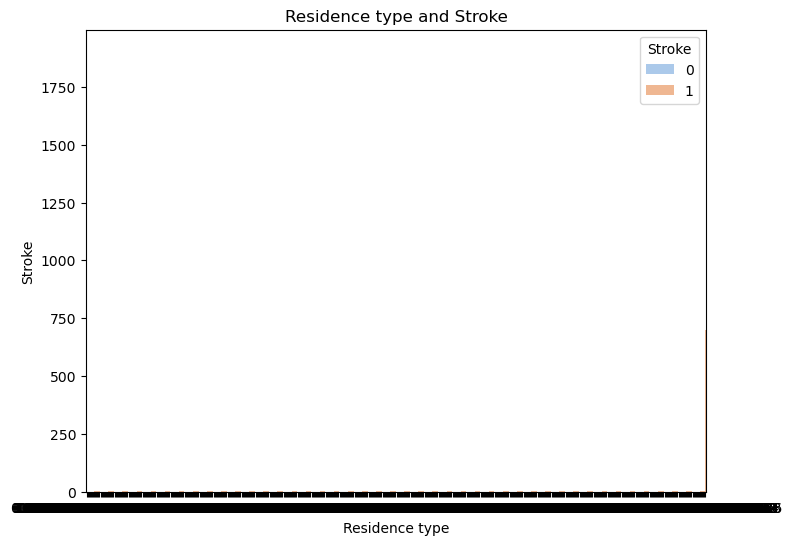

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type_Urban', hue='Stroke', data=train_data, palette='pastel')
plt.title('Residence type and Stroke')
plt.xlabel('Residence type')
plt.ylabel('Stroke')
plt.legend(title='Stroke', loc='upper right')
plt.show()